# Predicting Human Activity from Smartphone Data using Tensorflow Benchmarked against Random Forest Classifier

## From Kaggle:
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.
## Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

## Attribute information
For each record in the dataset the following is provided:

1. Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

2. Triaxial Angular velocity from the gyroscope.

3. A 561-feature vector with time and frequency domain variables.

4. Its activity label.

5. An identifier of the subject who carried out the experiment.

Import the Usual suspects

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

Combine the train test sets to make a new dataset and then reshuffle them. There was no need to do this but I decided that I wanted to reshuffle the data and practice some
data wrangling

In [3]:
#Combine the train test sets to make a new dataset and then reshuffle them. There was no need to do this but I decided that I wanted to reshuffle the data and practice some
#data wrangling
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

In [4]:
motion = data1.append(data2)

Shuffle the dataset in place and reset the index


In [5]:
motion = motion.sample(frac=1).reset_index(drop=True)


In [6]:
motion.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.280223,-0.015785,-0.110003,-0.995720,-0.982407,-0.982917,-0.996391,-0.981889,-0.982551,-0.938937,...,-0.949031,-0.295442,0.115837,0.017169,0.282006,-0.927326,0.128947,-0.024471,30,STANDING
1,0.274754,-0.019499,-0.108968,-0.988426,-0.992958,-0.982130,-0.988911,-0.991781,-0.979233,-0.933909,...,-0.766803,0.703159,0.741255,-0.662492,-0.722184,0.566204,-0.691726,-0.307235,4,LAYING
2,0.273935,-0.016023,-0.106849,-0.993865,-0.990422,-0.991090,-0.994627,-0.991434,-0.990548,-0.940770,...,-0.658732,-0.278928,0.064463,0.309665,0.237864,0.340430,-0.789157,-0.112264,11,LAYING
3,0.379892,-0.014352,-0.142958,0.355264,0.281737,-0.293122,0.314118,0.246300,-0.292639,0.587100,...,-0.577911,-0.642957,0.821412,-0.954953,-0.885661,-0.894334,0.166254,-0.010086,5,WALKING_DOWNSTAIRS
4,0.277260,-0.004804,-0.098744,-0.993214,-0.899984,-0.975804,-0.994306,-0.897019,-0.977452,-0.940551,...,-0.866125,0.017416,0.084777,-0.656586,-0.739807,-0.967212,0.112035,-0.001905,4,SITTING


In [7]:
motion.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [8]:
motion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [9]:
motion.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [10]:
motion['subject'].nunique()

30

In [11]:
motion['Activity'].nunique()

6

Since Tensorflow only understands integer classes, we need to code our target motions as integers and not strings


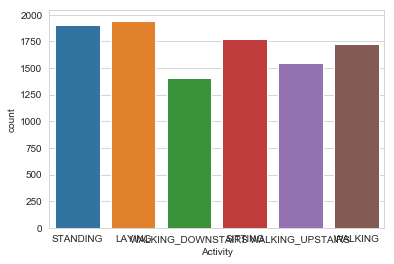

In [12]:
sns.countplot(motion['Activity'])

In [13]:
motion['Activity'].unique()

array(['STANDING', 'LAYING', 'WALKING_DOWNSTAIRS', 'SITTING',
       'WALKING_UPSTAIRS', 'WALKING'], dtype=object)

In [14]:
def transformer(active):
    if active == 'STANDING':
        return 0
    elif active == 'LAYING':
        return 1
    elif active == 'WALKING_UPSTAIRS':
        return 2
    elif active == 'SITTING':
        return 3
    elif active == 'WALKING':
        return 4
    else:
        return 5

In [15]:
motion['Activity'] = motion['Activity'].apply(lambda x:transformer(x))

In [17]:

motion['Activity']

0        0
1        1
2        1
3        5
4        3
5        1
6        5
7        3
8        1
9        2
10       4
11       4
12       1
13       0
14       3
15       1
16       1
17       3
18       2
19       1
20       3
21       0
22       0
23       2
24       4
25       5
26       3
27       3
28       4
29       1
        ..
10269    3
10270    3
10271    5
10272    0
10273    5
10274    5
10275    5
10276    3
10277    3
10278    0
10279    4
10280    5
10281    1
10282    1
10283    3
10284    3
10285    3
10286    2
10287    2
10288    1
10289    4
10290    1
10291    4
10292    2
10293    3
10294    1
10295    5
10296    0
10297    5
10298    2
Name: Activity, Length: 10299, dtype: int64

In [18]:
keys = list(motion.columns)

In [19]:
len(keys)

563

In [20]:
keys

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [21]:
vals = []
count = 0
for i in range(0,564):
    vals.append('cols'+str(count))
    count += 1

In [22]:
len(vals)

564

In [23]:
vals[563] = 'Activity'

In [24]:
vals[562] = 'Activity'

In [25]:
vals[561] = 'subject'

In [26]:
vals

['cols0',
 'cols1',
 'cols2',
 'cols3',
 'cols4',
 'cols5',
 'cols6',
 'cols7',
 'cols8',
 'cols9',
 'cols10',
 'cols11',
 'cols12',
 'cols13',
 'cols14',
 'cols15',
 'cols16',
 'cols17',
 'cols18',
 'cols19',
 'cols20',
 'cols21',
 'cols22',
 'cols23',
 'cols24',
 'cols25',
 'cols26',
 'cols27',
 'cols28',
 'cols29',
 'cols30',
 'cols31',
 'cols32',
 'cols33',
 'cols34',
 'cols35',
 'cols36',
 'cols37',
 'cols38',
 'cols39',
 'cols40',
 'cols41',
 'cols42',
 'cols43',
 'cols44',
 'cols45',
 'cols46',
 'cols47',
 'cols48',
 'cols49',
 'cols50',
 'cols51',
 'cols52',
 'cols53',
 'cols54',
 'cols55',
 'cols56',
 'cols57',
 'cols58',
 'cols59',
 'cols60',
 'cols61',
 'cols62',
 'cols63',
 'cols64',
 'cols65',
 'cols66',
 'cols67',
 'cols68',
 'cols69',
 'cols70',
 'cols71',
 'cols72',
 'cols73',
 'cols74',
 'cols75',
 'cols76',
 'cols77',
 'cols78',
 'cols79',
 'cols80',
 'cols81',
 'cols82',
 'cols83',
 'cols84',
 'cols85',
 'cols86',
 'cols87',
 'cols88',
 'cols89',
 'cols90',
 'cols91'

In [27]:
colNameDict = dict(zip(keys, vals))

In [28]:
colNameDict

{'tBodyAcc-mean()-X': 'cols0',
 'tBodyAcc-mean()-Y': 'cols1',
 'tBodyAcc-mean()-Z': 'cols2',
 'tBodyAcc-std()-X': 'cols3',
 'tBodyAcc-std()-Y': 'cols4',
 'tBodyAcc-std()-Z': 'cols5',
 'tBodyAcc-mad()-X': 'cols6',
 'tBodyAcc-mad()-Y': 'cols7',
 'tBodyAcc-mad()-Z': 'cols8',
 'tBodyAcc-max()-X': 'cols9',
 'tBodyAcc-max()-Y': 'cols10',
 'tBodyAcc-max()-Z': 'cols11',
 'tBodyAcc-min()-X': 'cols12',
 'tBodyAcc-min()-Y': 'cols13',
 'tBodyAcc-min()-Z': 'cols14',
 'tBodyAcc-sma()': 'cols15',
 'tBodyAcc-energy()-X': 'cols16',
 'tBodyAcc-energy()-Y': 'cols17',
 'tBodyAcc-energy()-Z': 'cols18',
 'tBodyAcc-iqr()-X': 'cols19',
 'tBodyAcc-iqr()-Y': 'cols20',
 'tBodyAcc-iqr()-Z': 'cols21',
 'tBodyAcc-entropy()-X': 'cols22',
 'tBodyAcc-entropy()-Y': 'cols23',
 'tBodyAcc-entropy()-Z': 'cols24',
 'tBodyAcc-arCoeff()-X,1': 'cols25',
 'tBodyAcc-arCoeff()-X,2': 'cols26',
 'tBodyAcc-arCoeff()-X,3': 'cols27',
 'tBodyAcc-arCoeff()-X,4': 'cols28',
 'tBodyAcc-arCoeff()-Y,1': 'cols29',
 'tBodyAcc-arCoeff()-Y,2': '

In [29]:
motion.rename(columns=colNameDict , inplace=True)

I had to do all of the Above because Tensorflow is very picky about column names

In [31]:
motion.head()

,cols0,cols1,cols2,cols3,cols4,cols5,cols6,cols7,cols8,cols9,...,cols553,cols554,cols555,cols556,cols557,cols558,cols559,cols560,subject,Activity
0,0.280223,-0.015785,-0.110003,-0.995720,-0.982407,-0.982917,-0.996391,-0.981889,-0.982551,-0.938937,...,-0.949031,-0.295442,0.115837,0.017169,0.282006,-0.927326,0.128947,-0.024471,30,0
1,0.274754,-0.019499,-0.108968,-0.988426,-0.992958,-0.982130,-0.988911,-0.991781,-0.979233,-0.933909,...,-0.766803,0.703159,0.741255,-0.662492,-0.722184,0.566204,-0.691726,-0.307235,4,1
2,0.273935,-0.016023,-0.106849,-0.993865,-0.990422,-0.991090,-0.994627,-0.991434,-0.990548,-0.940770,...,-0.658732,-0.278928,0.064463,0.309665,0.237864,0.340430,-0.789157,-0.112264,11,1
3,0.379892,-0.014352,-0.142958,0.355264,0.281737,-0.293122,0.314118,0.246300,-0.292639,0.587100,...,-0.577911,-0.642957,0.821412,-0.954953,-0.885661,-0.894334,0.166254,-0.010086,5,5
4,0.277260,-0.004804,-0.098744,-0.993214,-0.899984,-0.975804,-0.994306,-0.897019,-0.977452,-0.940551,...,-0.866125,0.017416,0.084777,-0.656586,-0.739807,-0.967212,0.112035,-0.001905,4,3


This is to be expected as most of the values are statistical measures of different kinds of physical activity

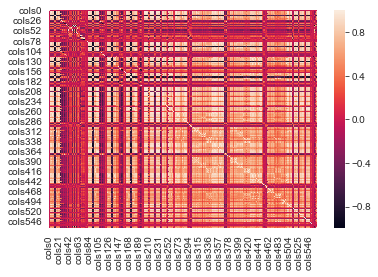

In [32]:
sns.heatmap(motion.corr())

Let's see if we can get any insights from this cluster map

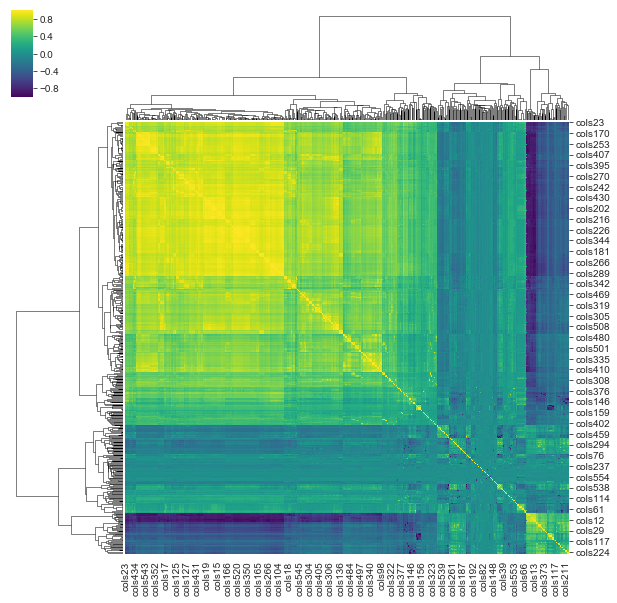

In [33]:

sns.clustermap(motion.corr(),cmap='viridis')

It looks cool but I don't think I really understand what the clusters really mean in this situation

In [34]:
#Import Tensorflow
import tensorflow as tf

In [35]:
X = motion.drop(['subject','Activity'],axis=1)
y = motion['Activity']

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
#Key line of code, creating the feature columns for Tensorflow
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [39]:
feat_cols

[_NumericColumn(key='cols0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='cols9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),


In [40]:
#Creating the DNN Classifier object
classifier = tf.estimator.DNNClassifier(hidden_units= [10,20,20,10],n_classes=6, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shahj\\AppData\\Local\\Temp\\tmpk0ecybkv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016A3B33C940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
#creating a tf.estimator.pandas_input_fn that takes in  X_train, y_train, batch_size with shuffle=True
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,num_epochs=5,shuffle=True)

In [42]:
classifier.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\shahj\AppData\Local\Temp\tmpk0ecybkv\model.ckpt.
INFO:tensorflow:loss = 37.76525, step = 1
INFO:tensorflow:global_step/sec: 6.85564
INFO:tensorflow:loss = 15.001992, step = 101 (14.600 sec)
INFO:tensorflow:global_step/sec: 8.51277
INFO:tensorflow:loss = 11.138591, step = 201 (11.746 sec)
INFO:tensorflow:global_step/sec: 8.5419
INFO:tensorflow:loss = 8.517696, step = 301 (11.709 sec)
INFO:tensorflow:global_step/sec: 8.08996
INFO:tensorflow:loss = 9.188243, step = 401 (12.433 sec)
INFO:tensorflow:Saving checkpoints for 500 into C:\Users\shahj\AppData\Local\Temp\tmpk0ecybkv\model.ckpt.
INFO:tensorflow:Loss for final step: 7.3653536.


Create a prediction input function

In [ ]:
pred_input_func =  tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,
                                                num_epochs=1,shuffle=False)

In [45]:
predictions = list(classifier.predict(input_fn=pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\shahj\AppData\Local\Temp\tmpk0ecybkv\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [46]:
final_pred = []

for pred in predictions:
    final_pred.append(pred['class_ids'][0])

In [47]:
final_pred

[1,
 0,
 0,
 3,
 1,
 4,
 4,
 1,
 4,
 0,
 2,
 1,
 3,
 0,
 5,
 4,
 4,
 0,
 2,
 3,
 5,
 3,
 2,
 4,
 4,
 4,
 0,
 4,
 1,
 5,
 1,
 2,
 1,
 4,
 2,
 3,
 2,
 3,
 4,
 4,
 4,
 0,
 1,
 0,
 4,
 4,
 1,
 2,
 4,
 4,
 4,
 1,
 1,
 4,
 3,
 2,
 4,
 3,
 4,
 3,
 0,
 0,
 2,
 0,
 0,
 3,
 0,
 2,
 2,
 1,
 4,
 5,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 4,
 3,
 2,
 0,
 5,
 0,
 4,
 2,
 5,
 3,
 0,
 2,
 4,
 4,
 2,
 2,
 5,
 5,
 2,
 0,
 5,
 4,
 3,
 0,
 4,
 0,
 3,
 0,
 4,
 4,
 3,
 5,
 4,
 4,
 2,
 4,
 1,
 3,
 4,
 0,
 2,
 5,
 5,
 1,
 4,
 3,
 2,
 4,
 4,
 3,
 2,
 4,
 2,
 4,
 0,
 3,
 0,
 1,
 5,
 1,
 1,
 1,
 5,
 2,
 5,
 4,
 5,
 3,
 4,
 1,
 4,
 2,
 1,
 0,
 0,
 4,
 0,
 0,
 3,
 5,
 1,
 5,
 1,
 4,
 3,
 5,
 0,
 5,
 2,
 4,
 1,
 4,
 5,
 1,
 0,
 3,
 0,
 1,
 0,
 4,
 5,
 5,
 2,
 4,
 2,
 3,
 2,
 4,
 0,
 2,
 4,
 4,
 2,
 0,
 5,
 5,
 1,
 3,
 1,
 5,
 0,
 4,
 2,
 1,
 5,
 0,
 2,
 0,
 3,
 0,
 4,
 4,
 4,
 4,
 4,
 3,
 0,
 0,
 3,
 2,
 5,
 4,
 5,
 4,
 1,
 1,
 0,
 3,
 4,
 3,
 4,
 2,
 4,
 2,
 5,
 2,
 1,
 0,
 4,
 0,
 0,
 4,
 1,
 4,
 1,
 0,
 1,
 0,
 5,
 1,


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(confusion_matrix(y_test,final_pred))
print('\n')
print(classification_report(y_test,final_pred))

[[580   0   0  38   0   0]
 [  0 618   0  31   0   0]
 [  0   0 334   0 180   6]
 [120  23   0 434   0   0]
 [  0   0   8   0 574   0]
 [  0   0  77   0   1 375]]


              precision    recall  f1-score   support

           0       0.83      0.94      0.88       618
           1       0.96      0.95      0.96       649
           2       0.80      0.64      0.71       520
           3       0.86      0.75      0.80       577
           4       0.76      0.99      0.86       582
           5       0.98      0.83      0.90       453

    accuracy                           0.86      3399
   macro avg       0.87      0.85      0.85      3399
weighted avg       0.86      0.86      0.86      3399



## Comparison with the Random Forest Approach

I tried to use the Random Forest Classifier on this Dataset. I couldnt even get the classifier trained in a realistic timeframe. That in an end of itself is testament of how powerful TensorFlow is

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000)
rfc.fit(X_train, y_train)

KeyboardInterrupt: 

## Citation
Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.